In [21]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv('..\sensor_data\Dataset.csv')
dataframe = dataframe[['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'A1', 'A2', 'A3', 'W1', 'W2', 'W3', 'Subject', 'Label']]
dataframe = dataframe.fillna('null')

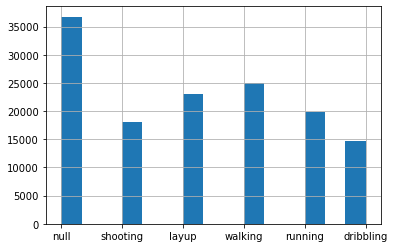

In [22]:
import matplotlib.pyplot as plt
dataframe["Label"].hist(bins=15)
plt.show()

In [23]:
X = dataframe.drop("Label", axis=1)
X = X.drop("Subject", axis=1)
X = X.values
y = dataframe["Label"]
y = y.values

In [24]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
y_encoded=le.fit_transform(y)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=12345)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
y_pred = model.predict(X_test)

In [27]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
#print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
#print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9504026821179986


In [28]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 15),"weights": ["uniform", "distance"]}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 15),
                         'weights': ['uniform', 'distance']})

In [29]:
gridsearch.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}